In [1]:
import boto3

import numpy as np
import pandas as pd


In [3]:
s3 = boto3.client('s3')
s3.download_file('beer-raw', 'beers.csv', 'beers.csv')
s3.download_file('beer-raw', 'reviews.csv', 'reviews.csv')

In [4]:
df_beers = pd.read_csv("beers.csv")
df_reviews = pd.read_csv("reviews.csv")

## Analise de cervejas

### Todas as cervejas 

In [5]:
df_beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11312 entries, 0 to 11311
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beer_name          11312 non-null  object 
 1   brewerys           11311 non-null  object 
 2   beer_type          11302 non-null  object 
 3   alcohol_volume     11312 non-null  object 
 4   ingredientes       2168 non-null   object 
 5   is_active          11312 non-null  object 
 6   is_sazonal         11312 non-null  object 
 7   rec_temperature    9088 non-null   object 
 8   rec_glass          9123 non-null   object 
 9   description        11312 non-null  object 
 10  average_rating     10928 non-null  float64
 11  smelling_rating    10928 non-null  object 
 12  Appearance_rating  10928 non-null  object 
 13  flavor_rating      10928 non-null  object 
 14  Sensation_rating   10928 non-null  object 
 15  ensemble_rating    10928 non-null  object 
 16  number_ratings     113

In [6]:
df_beers.head()

,beer_name,brewerys,beer_type,alcohol_volume,ingredientes,is_active,is_sazonal,rec_temperature,rec_glass,description,average_rating,smelling_rating,Appearance_rating,flavor_rating,Sensation_rating,ensemble_rating,number_ratings,country
0,Kaufbeuren Bayerisch Export,Aktienbrauerei Kaufbeuren,Munich Helles,5.2% ABV,"lúpulo Hallertau: Herkules, Hallertau Hallerta...",SIM,Não é sazonal,5-7 °C,Caneca,\nA cerveja exportação é um corpo cheio de cer...,3.8,6/10,5/5,16/20,4/5,7/10,1,alemanha
1,ACS Beer Citrus IPA,ACS Beer,Session IPA,4.8% ABV,NaN,SIM,Não é sazonal,NaN,NaN,\nA receita da ACS Beer Citrus segue o estilo ...,3.6,7/10,4/5,14/20,4/5,7/10,1,brasil
2,Agua Mala Mako Pale Ale,Agua Mala,American Pale Ale,3.4% ABV,NaN,SIM,Não é sazonal,8-12 °C,Pint,\nColor trigo dorado. En nariz predominan arom...,3.3,7/10,3/5,13/20,3/5,7/10,1,mexico
3,Against the Grain London Balling,Against The Grain Brewery & Smokehouse,Barley Wine,12.5% ABV,NaN,SIM,Não é sazonal,13-15 °C,Conhaque,\nEnglish style barleywine aged in Angel's Env...,3.8,8/10,5/5,15/20,3/5,7/10,1,estados-unidos
4,Agua Mala Astillero IPA,Agua Mala,Imperial / Double IPA,7.1% ABV,NaN,SIM,Não é sazonal,8-12 °C,Pint,\nDe color dorado cobrizo. Aromas florales y l...,4.0,7/10,4/5,16/20,5/5,8/10,1,mexico


In [33]:
df_beers.beer_type.count()

11302

<AxesSubplot:xlabel='beer_type'>

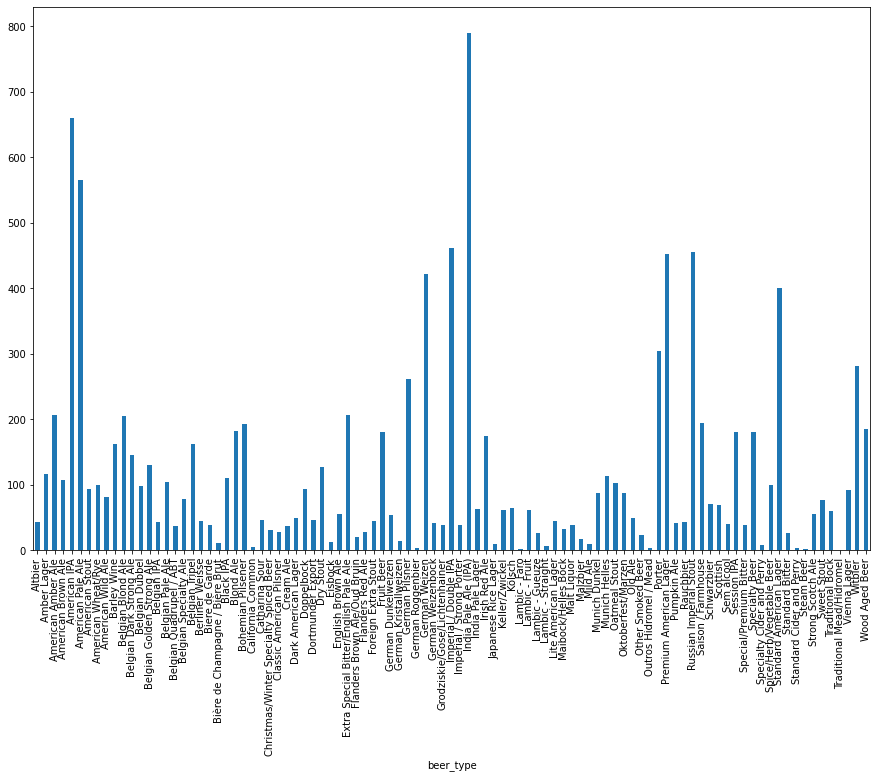

In [24]:
df_beers.groupby("beer_type")["beer_name"].count().plot.bar(figsize=(15,10))

In [25]:
df_beers.groupby("beer_type")["beer_name"].count().mean()

116.51546391752578

### Cervejas brasileiras

In [31]:
df_beers_brazil = df_beers[df_beers.country == "brasil"]

In [34]:
df_beers_brazil.head()

,beer_name,brewerys,beer_type,alcohol_volume,ingredientes,is_active,is_sazonal,rec_temperature,rec_glass,description,average_rating,smelling_rating,Appearance_rating,flavor_rating,Sensation_rating,ensemble_rating,number_ratings,country
1,ACS Beer Citrus IPA,ACS Beer,Session IPA,4.8% ABV,NaN,SIM,Não é sazonal,NaN,NaN,\nA receita da ACS Beer Citrus segue o estilo ...,3.6,7/10,4/5,14/20,4/5,7/10,1,brasil
8,Zyma Extra Special Bitter,Zyma Artesanal,Extra Special Bitter/English Pale Ale,5.2% ABV,"Água, malte, lúpulo e levedura.",SIM,Não é sazonal,5-7 °C,Pint,"\nPale Ale Inglesa, puro malte, Extra Special ...",2.3,4/10,3/5,10/20,2/5,4/10,1,brasil
11,Hoffen Bier Redmoon,Cervejaria Hoffen,Amber Lager,7.4% ABV,NaN,SIM,Não é sazonal,8-12 °C,Lager (Chope),\nCerveja Red Lager,3.4,7/10,4/5,13/20,3/5,7/10,10,brasil
12,Barbante Weiss,Academia Barbante de Cerveja,German Weizen,5.1% ABV,NaN,SIM,Não é sazonal,8-12 °C,Weizen,\nNão disponível.\n,2.9,6/10,3/5,11/20,3/5,6/10,1,brasil
13,Hoffen Weiss Maracujá,Cervejaria Hoffen,German Weizen,5.4% ABV,NaN,SIM,Não é sazonal,NaN,NaN,\nA Cervejaria Hoffen desenvolveu um rótulo em...,3.7,7/10,5/5,14/20,4/5,7/10,1,brasil


In [36]:
df_beers_brazil.beer_type.count()

4990

<AxesSubplot:xlabel='beer_type'>

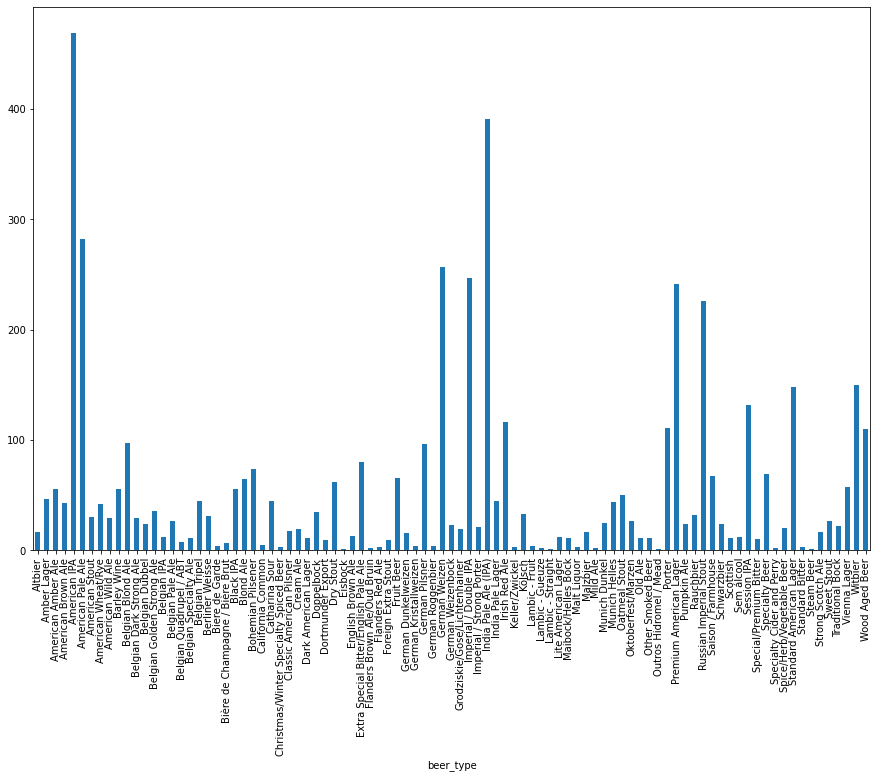

In [37]:
df_beers_brazil.groupby("beer_type")["beer_name"].count().plot.bar(figsize=(15,10))

In [38]:
df_beers_brazil.groupby("beer_type")["beer_name"].count().mean()

53.655913978494624

## Analise reviews de cervejas brasileiras

In [39]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21377 entries, 0 to 21376
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_name          21377 non-null  object 
 1   beer_name          21377 non-null  object 
 2   review_commentary  15748 non-null  object 
 3   overall            21377 non-null  float64
 4   aroma              21377 non-null  object 
 5   appearance         21377 non-null  object 
 6   flavor             21377 non-null  object 
 7   sensation          21377 non-null  object 
 8   ensemble           21377 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.5+ MB


In [40]:
df_reviews.head(10)

,user_name,beer_name,review_commentary,overall,aroma,appearance,flavor,sensation,ensemble
0,Fabio Vieira,Trilha Pão de Mel,Temperatura de degustação: Dez graus Celsius.,4.8,10/10,3/5,20/20,5/5,10/10
1,Daniel Ferreira de Paiva,Trilha Pão de Mel,Baixa formação de espuma.,4.6,10/10,4/5,18/20,5/5,9/10
2,Eduardo Guimarães Insta @cervascomedu,Trilha Pão de Mel,Servida na taça ISO apresentou coloração preta...,5.0,10/10,5/5,20/20,5/5,10/10
3,Francisco Lima,Trilha Pão de Mel,Cor preta profunda com um colarinho fina de co...,4.5,9/10,4/5,18/20,5/5,9/10
4,alberto basso,Creedence Brasil WeissBier 18 Anos,Não pense em uma simples cerveja de trigo! Alé...,4.8,10/10,4/5,19/20,5/5,10/10
5,Anderson Cesari,Creedence Brasil WeissBier 18 Anos,Muitas vezes eu me pergunto de onde saem as re...,4.1,8/10,4/5,17/20,4/5,8/10
6,LUCIANO WENGRZINSKI,Creedence Brasil WeissBier 18 Anos,"Uma cerveja do estilo Weiss com aromas únicos,...",4.8,10/10,5/5,18/20,5/5,10/10
7,Rogério Franzini,Creedence Brasil WeissBier 18 Anos,"""A VERDADEIRA CERVEJA DO ROCKNROLL'",4.7,10/10,4/5,18/20,5/5,10/10
8,Marco Dias,Nordeste Breakfast Stout,"- Aroma maltado tostado, café, biscoito de cho...",4.7,9/10,5/5,18/20,5/5,10/10
9,Fabio Vieira,Nordeste Breakfast Stout,Temperatura de degustação: Dez graus Celsius.,4.6,9/10,5/5,19/20,4/5,9/10


In [48]:
df_reviews.user_name.value_counts().mean()

18.80123131046614

In [47]:
len(df_reviews.groupby("user_name"))

1137

In [54]:
len(df_reviews)

21377

In [53]:
len(df_reviews)/len(df_reviews.groupby("user_name"))

18.80123131046614

In [58]:
df_beers_brazil[df_beers_brazil.beer_name == "Creedence Brasil WeissBier 18 Anos"]

,beer_name,brewerys,beer_type,alcohol_volume,ingredientes,is_active,is_sazonal,rec_temperature,rec_glass,description,average_rating,smelling_rating,Appearance_rating,flavor_rating,Sensation_rating,ensemble_rating,number_ratings,country
292,Creedence Brasil WeissBier 18 Anos,Wensky Beer,German Weizen,5.5% ABV,"ÁGUA, MALTE DE CEVADA, MALTE DE TRIGO LÚPULO E...",SIM,Comemorativa,5-7 °C,Weizen,\n,4.6,10/10,4/5,18/20,5/5,10/10,4,brasil


In [59]:
df_beers_brazil[df_beers_brazil.beer_name == "Nordeste Breakfast Stout"]

,beer_name,brewerys,beer_type,alcohol_volume,ingredientes,is_active,is_sazonal,rec_temperature,rec_glass,description,average_rating,smelling_rating,Appearance_rating,flavor_rating,Sensation_rating,ensemble_rating,number_ratings,country
6843,Nordeste Breakfast Stout,Cervejaria MinduBier,Russian Imperial Stout,12.9% ABV,NaN,SIM,Colaborativa,8-12 °C,Conhaque,\nImperial Stout com melado de cana e café mat...,4.5,9/10,5/5,18/20,5/5,9/10,6,brasil


In [60]:
df_beers_brazil[df_beers_brazil.beer_name == "Creedence Brasil WeissBier 18 Anos"]

,beer_name,brewerys,beer_type,alcohol_volume,ingredientes,is_active,is_sazonal,rec_temperature,rec_glass,description,average_rating,smelling_rating,Appearance_rating,flavor_rating,Sensation_rating,ensemble_rating,number_ratings,country
292,Creedence Brasil WeissBier 18 Anos,Wensky Beer,German Weizen,5.5% ABV,"ÁGUA, MALTE DE CEVADA, MALTE DE TRIGO LÚPULO E...",SIM,Comemorativa,5-7 °C,Weizen,\n,4.6,10/10,4/5,18/20,5/5,10/10,4,brasil
